In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_images
dataset = np.array(load_sample_images().images,dtype=np.float32)
images = tf.constant(dataset)

In [2]:
batch_size,height,width,channels = dataset.shape

In [3]:
# Create 7X7 filter one is vertical and one is horizontal

In [4]:
filters_test = np.zeros(shape=(7,7,channels,2),
                       dtype=np.float32)
filters_test[:,3,:,1] = 1 #vertical line
#filters_test[3,:,:,1] =1 #horizontal line
filters = tf.constant(filters_test)

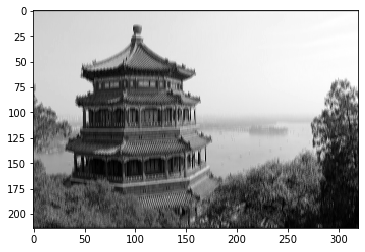

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
output = tf.nn.conv2d(images,filters,strides=2,padding="SAME")
plt.imshow(output[0,:,:,1], cmap='gray')
plt.show()

In [6]:
X = tf.placeholder(tf.float32,shape=(None, height, width,channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1],padding="SAME")

AttributeError: module 'tensorflow' has no attribute 'placeholder'

X is input mini batch a 4d tensor

filters is the set of filters to apply also a 4D tensor

Strides is a four elements are the vertical & horizontal strides 

#### tf.nn.conv2d(input, filter, strides=[1, 2, 2, 1], padding='SAME')
#### strides = [1, stride_height, stride_width, 1]


The first and last values are always 1 (batch and channels).

The middle two control how the filter slides over the height and width.

### Batch Size
Think of it as the number of images you're processing at once.

Example: If batch_size = 32, you're feeding in 32 images at the same time to the model.

Helps speed up training via vectorized computation on GPUs.

### Channels
Represents color channels in the image:

1 → Grayscale

3 → RGB (Red, Green, Blue)

In deeper CNN layers, channels can represent feature maps instead of color.


In [ ]:
output = tf.nn.conv2d(images, filters, strides=[1, 2, 2, 1], padding="SAME")


1 → batch (leave it 1)

2 → height stride (downward step = 2 pixels)

2 → width stride (rightward step = 2 pixels)

1 → channels (leave it 1)

padding must be either "VALID" or "SAME":


o If set to "VALID", the convolutional layer does not use zero padding,and may ignore some rows and columns at the bottom and right of the input image, depending on the stride


o If set to "SAME", the convolutional layer uses zero padding if
necessary.

(5 X 5 X 3 + 1) X 200 = 15,200

filter  RGB bias f-map

### Pooling Layer 

The goal of pooling layers is to Subsample(shrink) the input image in order to reduce

The computational load

The memory usages and

The number of parameters (limiting the risk of overfitting)

In [7]:
from tensorflow import keras

Max Pool

In [10]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2,strides=None,padding='valid')
output_max_pool = max_pool(images)

Avg Pool

In [11]:
avg_pool = tf.keras.layers.AvgPool2D(pool_size=2,strides=None,padding='valid')
output_avg_pool = avg_pool(images)

CNN Architectures
Typical CNN architectures stack a few convolutional layers

Each one generally followed by a ReLU layer

Then a pooling layer

Then another few convolutional layers (+ReLU)

Then another pooling layer, and so on